implementation of a multi-layer perceptron (MLP) from scratch in Python (using NumPy) to solve the XOR classification problem. It uses gradient descent for training and includes visualization of the decision boundary.

In [16]:
import numpy as np
import matplotlib.pyplot as plt


In [17]:

# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [ ]:

# XOR data
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

# Set seed for reproducibility
np.random.seed(42)

# Initialize weights and biases
input_size = 2
hidden_size = 4
output_size = 1

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Training parameters
epochs = 10000
lr = 0.1

In [ ]:

# Training loop
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Compute loss (Mean Squared Error)
    loss = np.mean((y - a2) ** 2)

    # Backward pass
    d_a2 = (a2 - y)
    d_z2 = d_a2 * sigmoid_derivative(a2)
    d_W2 = np.dot(a1.T, d_z2)
    d_b2 = np.sum(d_z2, axis=0, keepdims=True)

    d_a1 = np.dot(d_z2, W2.T)
    d_z1 = d_a1 * sigmoid_derivative(a1)
    d_W1 = np.dot(X.T, d_z1)
    d_b1 = np.sum(d_z1, axis=0, keepdims=True)

    # Update weights and biases
    W1 -= lr * d_W1
    b1 -= lr * d_b1
    W2 -= lr * d_W2
    b2 -= lr * d_b2

    if epoch % 1000 == 0:
        print(f"Epoch {epoch} - Loss: {loss:.4f}")

Epoch 0 - Loss: 0.2832
Epoch 1000 - Loss: 0.2452
Epoch 2000 - Loss: 0.2124
Epoch 3000 - Loss: 0.1503
Epoch 4000 - Loss: 0.0572
Epoch 5000 - Loss: 0.0209
Epoch 6000 - Loss: 0.0107
Epoch 7000 - Loss: 0.0067
Epoch 8000 - Loss: 0.0047
Epoch 9000 - Loss: 0.0035



Final output predictions:
[[0.]
 [1.]
 [1.]
 [0.]]


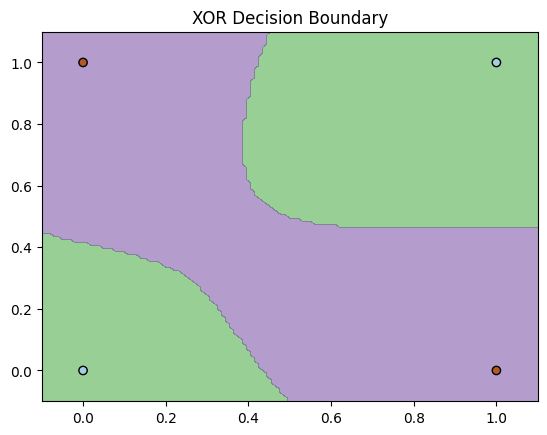

In [20]:

# Final output
print("\nFinal output predictions:")
print(a2.round())

# Plotting decision boundary
def plot_decision_boundary(pred_func):
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Forward pass
    z1 = np.dot(grid, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    preds = sigmoid(z2).reshape(xx.shape)
    
    plt.contourf(xx, yy, preds > 0.5, cmap=plt.cm.Paired, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], edgecolors='k', cmap=plt.cm.Paired)
    plt.title("XOR Decision Boundary")
    plt.show()

plot_decision_boundary(lambda x: a2)
